## Used libraries

In [292]:
from SALib.analyze import sobol
from SALib.sample import saltelli
import numpy as np
import numpy.linalg as linalg
import pandas
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize
from read_csv_data1 import *

## Parameters

In [293]:
mu_o = 0.007 #taux de mortalité et natalité des oiseaux en jours-1
beta_o = 0.201 #taux d'infection des oiseaux par les moustiques
gamma_o = 1/7 #taux de guérison des oiseaux
delta_o = 0.03 #taux de mortalité des oiseaux
rho_o = 1/100 #taux de "retour" dans la catégorie susceptible en jours-1

mu_v = 1/4 #taux de mortalité et natalité des moustiques en jours-1
beta_vo = 0.5 #taux d'infection des moustiques par les oiseaux
beta_vh = 0.5 #taux d'infection des moustiques par les humains

mu_h = 1/25000 #taux de mortalité et natalité es humains
beta_h = 0.150 #taux d'infection des humains par les moustiques
q = 0.93 #pourcentage de cas asymptomatiques
gamma_h = 1/15 #taux de guérison des humains
# delta_h = 0.132 #taux de mortalité pour les cas présentants des symptômes
rho_h = 0.011 #taux de "retour" dans la catégorie susceptible en jours-1

param = (mu_o, beta_o, gamma_o, delta_o, rho_o, mu_v, beta_vo, beta_vh, mu_h, beta_h, q, gamma_h, rho_h)


## Model

In [294]:
def model_class(Y,t, mu_o,beta_o, gamma_o, delta_o, rho_o, mu_v , beta_vo, beta_vh, mu_h , beta_h, q ,gamma_h ,rho_h):
    S_o, I_o, R_o, D_o, S_v, I_v, S_h, I_h, I_hs, R_h = Y
    
    N_o = S_o + I_o + R_o
    N_h = S_h + I_h + R_h
    N_v = S_v + I_v
    
    dS_o = mu_o*N_o + rho_o*R_o - (mu_o+beta_o*I_v/N_o)*S_o
    dI_o = beta_o*I_v*S_o/N_o - (mu_o+gamma_o+delta_o)*I_o
    dR_o = gamma_o*I_o - (mu_o+rho_o)*R_o
    dD_o = delta_o*I_o
    
    dS_v = mu_v*N_v - (mu_v+beta_vo*I_o/N_o+beta_vh*I_h/N_h)*S_v
    dI_v = beta_vo*I_o*S_v/N_o + beta_vh*I_h*S_v/N_h- mu_v*I_v
                
    dS_h = mu_h*N_h +rho_h*R_h - (mu_h + beta_h * I_v/N_h)*S_h
    dI_h = beta_h*I_v*S_h/N_h - I_h*(1-q) - gamma_h*I_h
    dI_hs = I_h*(1-q)/9
    dR_h = gamma_h*I_h 
                
    return ([dS_o,dI_o,dR_o,dD_o,dS_v,dI_v,dS_h,dI_h,dI_hs,dR_h])

## 1. Test of interventions

        

## The optimal method: to quarantine 32% of goslings migrants and to kill all the mosquitoes at time t = 20

In [295]:
# Vector at time 0
Y0 = [20000, 100, 0, 0, 20000, 0, 21300, 0, 0, 0]
time = np.linspace(0, 20,20)

# Solution
sol = integrate.odeint(model_class, Y0, time, args=param)
Y1 = sol[19, :]


time2 = np.linspace(20, 99,100)
sol2 = integrate.odeint(model_class, Y1, time2, args=param)

total_time = np.concatenate((time,time2))
total_sol = np.concatenate((sol,sol2))

plt.plot(total_time, total_sol[:, 0], label='S_o')
plt.plot(total_time,  total_sol[:, 1], label='I_o')
plt.plot(total_time,  total_sol[:, 2], label='R_o')
plt.plot(total_time,  total_sol[:, 3], label='D_o')

plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model")
plt.grid()
plt.show()
plt.figure()

plt.plot(total_time, total_sol[:, 6], label='S_h')
plt.plot(total_time, total_sol[:, 7], label='I_ha')
plt.plot(total_time, total_sol[:, 8], label='I_hs')
plt.plot(total_time, total_sol[:, 9], label='R_h')

plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model")
plt.grid()
plt.show()


1332.9042609097567


## Mission 1

In [296]:


data = infection_data_to_array()



## Fit model by fitting the number of dead birds and the total number of infected

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1930858684363D+02   r2 =  0.1332207824111D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1930858684363D+02   r2 =  0.2527656287353D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1930858684363D+02   r2 =  0.2527656287353D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1930858684363D+02   r2 =  0.2527656287353D-15
 lsoda--  warning..internal t (=r1) 

/var/folders/3l/k4zmyq4j7fb5v6ptnw1kvnpw0000gn/T/ipykernel_6712/616199019.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  dS_o = mu_o*N_o + rho_o*R_o - (mu_o+beta_o*I_v/N_o)*S_o
/var/folders/3l/k4zmyq4j7fb5v6ptnw1kvnpw0000gn/T/ipykernel_6712/616199019.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  dI_o = beta_o*I_v*S_o/N_o - (mu_o+gamma_o+delta_o)*I_o
/var/folders/3l/k4zmyq4j7fb5v6ptnw1kvnpw0000gn/T/ipykernel_6712/616199019.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  dS_v = mu_v*N_v - (mu_v+beta_vo*I_o/N_o+beta_vh*I_h/N_h)*S_v
/var/folders/3l/k4zmyq4j7fb5v6ptnw1kvnpw0000gn/T/ipykernel_6712/616199019.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  dI_v = beta_vo*I_o*S_v/N_o + beta_vh*I_h*S_v/N_h- mu_v*I_v


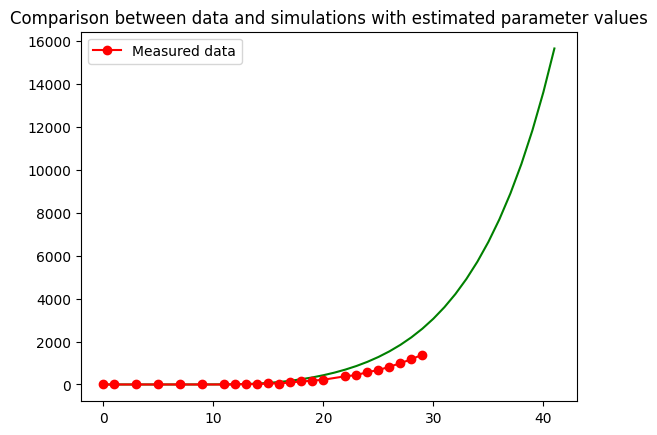

2.402
3065.921875474065
301.4555682924093 991.2092009096838


In [297]:
Y0 = [33000, 10, 0, 0, 20000, 0, 13000, 0, 0, 0]

def fitting_function(params_to_fit, times, data):
    beta_o , gamma_o , delta_o , rho_o , mu_v ,  beta_vh , mu_h , beta_h , q , gamma_h , rho_h, beta_vo  = params_to_fit
    params = ( mu_o, beta_o ,gamma_o , delta_o, rho_o , mu_v  , beta_vh ,mu_h ,beta_h , q ,gamma_h,rho_h,beta_vo )
    model_predictions = integrate.odeint(model_class, Y0, times, args=params)
    model_predictions= np.concatenate((np.array(model_predictions[:,3]), np.array(model_predictions[:,8])))
    
    diff = model_predictions - data
    return (diff)

time = data[:, 0]

total_infections = data[:, 2]+data[:, 4]+data[:, 6]
dat = np.concatenate((np.array(data[:,1]) , np.array(total_infections)))

initial_guess = [ beta_o , gamma_o , delta_o , rho_o , mu_v , beta_vh , mu_h , beta_h , q , gamma_h , rho_h, beta_vo ]
result = optimize.least_squares(fitting_function, initial_guess, args=(time, dat))
fitted_beta_o = round(result.x[0], 3)
fitted_gamma_o = round(result.x[1], 3)
fitted_delta_o = round(result.x[2], 3)
fitted_rho_o = round(result.x[3], 3)
fitted_mu_v = round(result.x[4], 3)
fitted_beta_vh = round(result.x[5], 3)
fitted_mu_h = round(result.x[6], 3)
fitted_beta_h = round(result.x[7], 3)
fitted_q= round(result.x[8], 3)
fitted_gamma_h = round(result.x[9],3)

fitted_rho_h = round(result.x[10],3)
fitted_beta_vo = round(result.x[11],3)

fitting_modele_class = integrate.odeint(model_class, Y0, np.linspace(0,41,42), args= (mu_o, fitted_beta_o ,
fitted_gamma_o ,
fitted_delta_o ,
fitted_rho_o,
fitted_mu_v , 
fitted_beta_vh ,
fitted_mu_h ,
fitted_beta_h ,
fitted_q,
fitted_gamma_h ,
fitted_rho_h ,fitted_beta_vo, ))


plt.plot(np.linspace(0,41,42)
    ,fitting_modele_class[:,3],
    color="green")
plt.plot(time, data[:,1], label="Measured data", marker="o", color="red") 
plt.plot
plt.legend()
plt.title("Comparison between data and simulations with estimated parameter values")
plt.show()

plt.plot(np.linspace(0,41,42)
    ,fitting_modele_class[:,8],
    color="green")

plt.plot(time, total_infections, label="Measured data", marker="o", color="red") 
plt.plot
plt.legend()
plt.title("Comparison between data and simulations with estimated parameter values")
plt.show()

print(fitted_q)
print(fitting_modele_class[:,3][30])
print(fitting_modele_class[:,8][32], fitting_modele_class[:,8][41])
